# **Final Project**

- **<font color = maroon size = "4">Marketing Analytics DAB 303</font>**
- **<font color = maroon size = "4">Prepared by - Hardeep Kaur, Yash Agrawal, Kshitij Segal</font>**
- **<font color = maroon size = "4">Under the guidance of - Professor Manjari Maheshwari and Professor Muhammad Anwar Shahid</font>**

## **Introduction**
**<font size="4">_In this project, we are working on Instacart dataset. As per the description shared on [Kaggle](https://www.kaggle.com/c/instacart-market-basket-analysis/overview), Instacart open sourced this data - see their blog post on [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)._</font>**    

**<font size="4">_Our objective is to analyze this dataset and to provide insights in the form of:_</font>**     

**<font size="4">1. Exploratory Data Analysis</font>**    
**<font size="4">2. Customer Segmentation on Instacart dataset</font>**     
**<font size="4">3. Classification Model to Predict whether a customer will reorder or not</font>**     

## **Data Dictionary**
**<font size="3.5">Each entity (customer, product, order, aisle, etc.) has an associated unique id.</font>**     
- aisles.csv
- departments.csv
- order_products__prior.csv
- orders.csv
- products.csv

**Detailed Description:** https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b



## **Tasks**   
**<font size="4">In this notebook, we are performing `Segmentation Techniques` to understand our audience better.</font>**   

In [1]:
#Import Standard Libraries
import pandas as pd #For dataframe manipulations
import numpy as np #For numerical calculations
import matplotlib.pyplot as plt #For plotting and visualization
import seaborn as sns #For plotting and visualization
%matplotlib inline

from warnings import filterwarnings #To ignore warnings
filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder #For preprocessing of dataframe and label encoding

# Importing algorithms to build models
from sklearn.cluster import KMeans

# metrics used for evaluation of the model
from sklearn.metrics import accuracy_score, classification_report, silhouette_samples, silhouette_score

from yellowbrick.cluster import KElbowVisualizer #To visualization of k value
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer #To visualize silhouette scores

In [2]:
#Read Orders Dataset
orders = pd.read_csv("orders.csv")
orders.head() #View dataframe

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
aisles = pd.read_csv("aisles.csv") #Read Aisles dataset
aisles.head() #View dataframe

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
dept = pd.read_csv("departments.csv") #View Departments dataset
dept.head() #View dataframe

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products = pd.read_csv("products.csv") #View products dataset
products.head() #View dataframe

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
order_products = pd.read_csv("order_products__prior.csv") #View Order_Products dataset
order_products.head() #View dataframe

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
#View the shapes of all the dataframes

print(orders.shape)
print(aisles.shape)
print(dept.shape)
print(products.shape)
print(order_products.shape)

(3421083, 7)
(134, 2)
(21, 2)
(49688, 4)
(32434489, 4)


In [8]:
#Evaluate the count of null values in all the dataframes

print(f"Table Orders:\n{orders.isna().sum()}\n")
print(f"Table Aisles:\n{aisles.isna().sum()}\n")
print(f"Table Department:\n{dept.isna().sum()}\n")
print(f"Table Products:\n{products.isna().sum()}\n")
print(f"Table Order_Products:\n{order_products.isna().sum()}\n")

Table Orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Table Aisles:
aisle_id    0
aisle       0
dtype: int64

Table Department:
department_id    0
department       0
dtype: int64

Table Products:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Table Order_Products:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



In [9]:
#Merging all the dataframes into one

temp_1 = pd.merge(order_products, products, on=['product_id', 'product_id'])
temp_2 = pd.merge(temp_1, dept, on=['department_id','department_id'])
temp_3 = pd.merge(temp_2, aisles, on=['aisle_id','aisle_id'])
df = pd.merge(temp_3, orders, on=['order_id','order_id'])

In [10]:
#Perform sorting on the merged_dataframe 

df.sort_values(by=['user_id', 'order_id', 'product_id'], ascending=True, inplace=True)
df.reset_index(inplace=True) #reset indices
df.drop(['index'], axis=1, inplace=True) #drop the unwanted index column
df.head() #View dataframe

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,Soda,77,7,beverages,soft drinks,1,prior,5,4,15,28.0
1,431534,10258,3,1,Pistachios,117,19,snacks,nuts seeds dried fruit,1,prior,5,4,15,28.0
2,431534,10326,5,0,Organic Fuji Apples,24,4,produce,fresh fruits,1,prior,5,4,15,28.0
3,431534,12427,2,1,Original Beef Jerky,23,19,snacks,popcorn jerky,1,prior,5,4,15,28.0
4,431534,13176,8,1,Bag of Organic Bananas,24,4,produce,fresh fruits,1,prior,5,4,15,28.0


In [11]:
#view shape of teh dataset
df.shape

(32434489, 15)

In [12]:
#Evaluate NaN values
df.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

**<font size="4">_Since, we have huge amount of data, we can drop the rows which have null values in them._</font>**

In [13]:
df.dropna(inplace=True)
df.reset_index(inplace=True) #reset indices
df.drop(['index'], axis=1, inplace=True) #drop unwanted index column

In [14]:
#View the shape of dataframe
df.shape

(30356421, 15)

In [15]:
#View the dataset
df.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,Soda,77,7,beverages,soft drinks,1,prior,5,4,15,28.0
1,431534,10258,3,1,Pistachios,117,19,snacks,nuts seeds dried fruit,1,prior,5,4,15,28.0


# **Customer Segmentation**

## **Introduction to K-Means Clustering Algorithm**
### As per *Introduction to Machine Learning with Python* by Andreas C. Müller & Sarah Guido, 
#### k-means clustering is one of the simplest and most commonly used clustering algorithms. It tries to find cluster centers that are representative of certain regions of the data. The algorithm alternates between two steps: assigning each data point to the closest cluster center, and then setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.

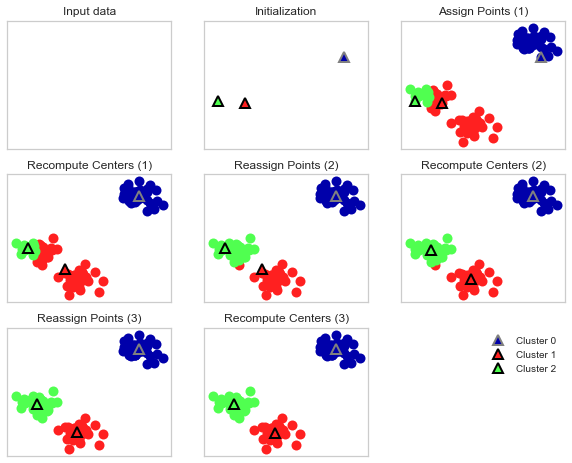

In [103]:
import mglearn as mg

mg.plots.plot_kmeans_algorithm()

In [17]:
#View the information related to the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30356421 entries, 0 to 30356420
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.4+ GB


In [18]:
#Count the number of products per order
num_products = pd.DataFrame(df.groupby('order_id')['product_id'].count()) 
num_products.rename(columns = {"product_id":"num_products"}, inplace=True)
num_products.head()

,num_products
order_id,
2,9
3,8
4,13
5,26
6,3


In [19]:
#Select the columns that we need for segmentation
cols = ['order_id',  'user_id',  'order_number',  'order_dow',  'order_hour_of_day',  'days_since_prior_order']
data = df[cols]
data = data.join(num_products, on='order_id') #Join the dataframe data with num_products dataframe on order_id
data.head() #view dataframe

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products
0,431534,1,5,4,15,28.0,8
1,431534,1,5,4,15,28.0,8
2,431534,1,5,4,15,28.0,8
3,431534,1,5,4,15,28.0,8
4,431534,1,5,4,15,28.0,8


In [20]:
#data.fillna(0.0, inplace=True)
#data.head()

In [21]:
data.shape #view shape

(30356421, 7)

**<font size="4">In the succeeding code cells, we are calculating the following:</font>**

- Total number of orders per customer (grouped by user_id column)
- Evaluation of orders on peak days
- Evaluation of orders placed on peak days per user_id
- Mean Hour of Order placement per user_id
- Evaluation of Orders placed in peak hours (10<=hours<=15)
- Mean peak time per user_id
- Average delay since last order per user_id
- Average number of products placed per user_id

In [22]:
#Calculate total number of orders per customer
num_orders = data.groupby('user_id')['order_number'].sum()
num_orders.shape #view shape

(206209,)

**<font size="4">Max Orders are placed on Sundays (order_dow=0) and Mondays (order_dow=1)</font>** 

In [23]:
# Create boolean column to record whether order occurred on a peak day
data['order_on_peak'] = np.where(data['order_dow'] <=1, 1, 0)
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products,order_on_peak
0,431534,1,5,4,15,28.0,8,0
1,431534,1,5,4,15,28.0,8,0
2,431534,1,5,4,15,28.0,8,0
3,431534,1,5,4,15,28.0,8,0
4,431534,1,5,4,15,28.0,8,0


In [24]:
# Calculate rate of peak day ordering per customer
peakday_rate = round(data.groupby('user_id')['order_on_peak'].mean(), 2)

In [25]:
# Calculate mean ordering hour per user
mean_hour = round(data.groupby('user_id')['order_hour_of_day'].mean(), 0)

In [26]:
# Create boolean column to record whether order occurred during peak hours
# Peak hours defined as interquartile range of order times
data['peak_time'] = np.where((data.order_hour_of_day >= 10) 
                                  & (data.order_hour_of_day <= 15), 1, 0)
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products,order_on_peak,peak_time
0,431534,1,5,4,15,28.0,8,0,1
1,431534,1,5,4,15,28.0,8,0,1
2,431534,1,5,4,15,28.0,8,0,1
3,431534,1,5,4,15,28.0,8,0,1
4,431534,1,5,4,15,28.0,8,0,1


In [27]:
# Calculate rate of peak time ordering per customer
peaktime_rate = round(data.groupby('user_id')['peak_time'].mean(), 2)

In [28]:
# Calculate mean delay per customer
mean_delay = round(data.groupby('user_id')['days_since_prior_order'].mean(), 0)

In [29]:
# Calculate mean products ordered per customer
mean_products = round(data.groupby('user_id')['num_products'].mean(), 0)

In [30]:
#Concatenate all the columns into one.
cols = ['num_orders', 'peakday_rate', 'mean_hour', 'peaktime_rate', 'mean_delay', 'mean_products']
final_data = pd.concat([num_orders, peakday_rate, mean_hour, peaktime_rate, mean_delay, mean_products], axis=1)
final_data.columns = ['num_orders', 'peakday_rate', 'mean_hour', 'peaktime_rate', 'mean_delay', 'mean_products']

In [31]:
#View dataframe
final_data.head()

,num_orders,peakday_rate,mean_hour,peaktime_rate,mean_delay,mean_products
user_id,,,,,,
1,338,0.31,11.0,0.35,20.0,6.0
2,1554,0.35,10.0,0.64,16.0,16.0
3,518,0.67,17.0,0.19,11.0,8.0
4,48,0.00,14.0,1.00,15.0,5.0
5,81,0.81,17.0,0.00,14.0,10.0


In [32]:
#Check for missing values

final_data.isna().sum()

num_orders       0
peakday_rate     0
mean_hour        0
peaktime_rate    0
mean_delay       0
mean_products    0
dtype: int64

In [33]:
final_data.shape

(206209, 6)

## **Visualization of Final Dataframe**

<Figure size 1080x1080 with 0 Axes>

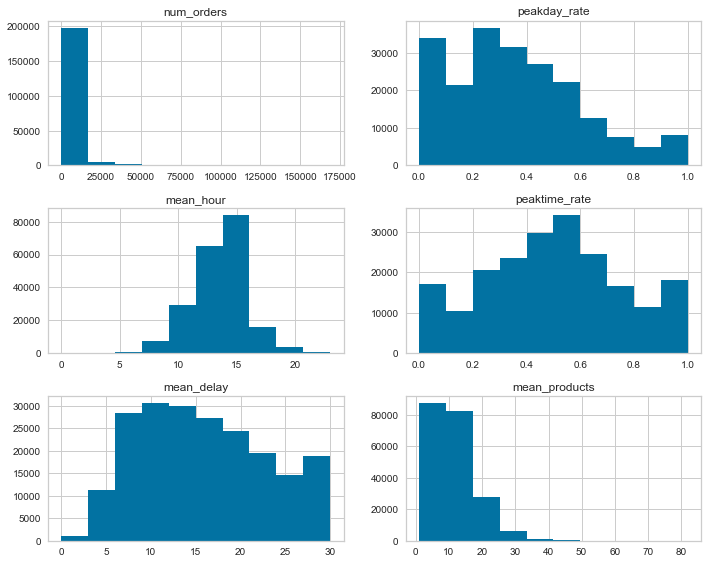

In [34]:
plt.figure(figsize=(15,15))
final_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

**<font size="4">We can perform log transformations for better results.</font>**

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

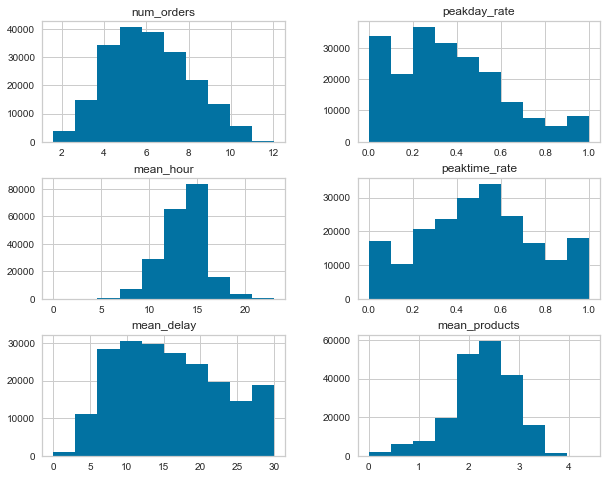

In [35]:
final_data['num_orders'] = np.log(final_data['num_orders'])
final_data['mean_products'] = np.log(final_data['mean_products'])
final_data.hist(figsize=(10,8))
plt.tight_layout

In [36]:
#Scale the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_data)

In [37]:
# Convert to DataFrame and check summary stats
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['num_orders', 'peakday_rate', 'mean_hour', 'peaktime_rate', 'mean_delay', 'mean_products']
data_scaled.head()

,num_orders,peakday_rate,mean_hour,peaktime_rate,mean_delay,mean_products
0,-0.173853,-0.194865,-1.069634,-0.560096,0.628022,-0.759475
1,0.626955,-0.036282,-1.490662,0.527445,0.073500,0.758502
2,0.050256,1.232382,1.456530,-1.160118,-0.619652,-0.314245
3,-1.198443,-1.423883,0.193448,1.877496,-0.065131,-1.041644
4,-0.923772,1.787423,1.456530,-1.872645,-0.203761,0.031103


## **K-Means Clustering**

### **K-MEANS - APPLYING ELBOW METHOD TO FIND THE BEST NUMBER OF CLUSTERS**

- The basic idea behind partitioning methods or segmentation (e.g. k-means clustering) is to define clusters such that the total intra-cluster variation (or total within-cluster sum of square (WSS)) is minimized. 
- The total WSS measures the compactness of the clustering and we want it to be as small as possible.
- The Elbow method looks at the total WSS as a function of the number of clusters. 
- One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

In [38]:
cost = [] # Declare empty array

# Cost here signifies the WSS

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=1) # Invoke KMeans Model
    kmeans.fit(data_scaled) # Fit KMeans model
    cost.append(kmeans.inertia_)


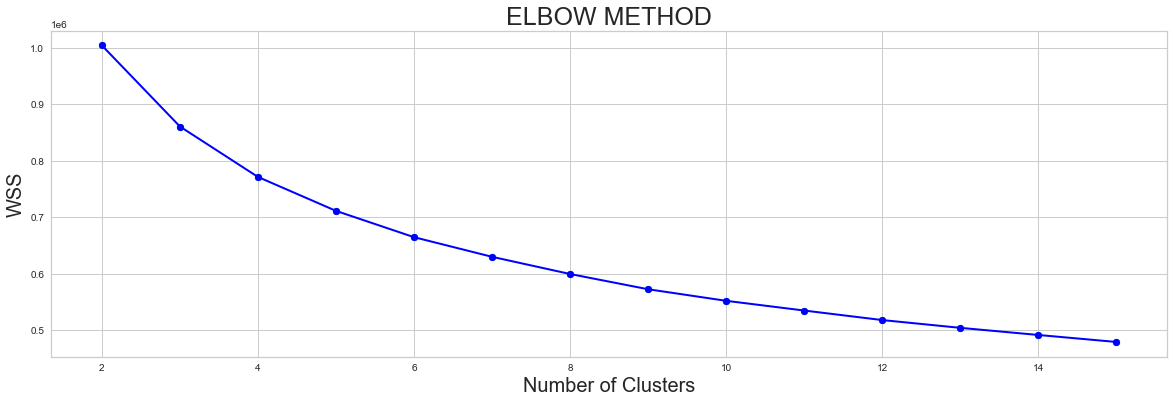

In [39]:
plt.figure(figsize=(20,6)) # Set the size of the figure
plt.scatter(np.arange(2,16),cost) # Create scatter plot for number of clusters
plt.plot(np.arange(2,16),cost, marker='o', lw=2, color='blue') # Plot number of Clusters
plt.title("ELBOW METHOD", size=25) # Set the title of plot
plt.xlabel("Number of Clusters", size=20) # X axis Label
plt.ylabel("WSS", size=20) # Y axis label
plt.rcParams["figure.figsize"] = (8,8)
plt.show() # Show the plot

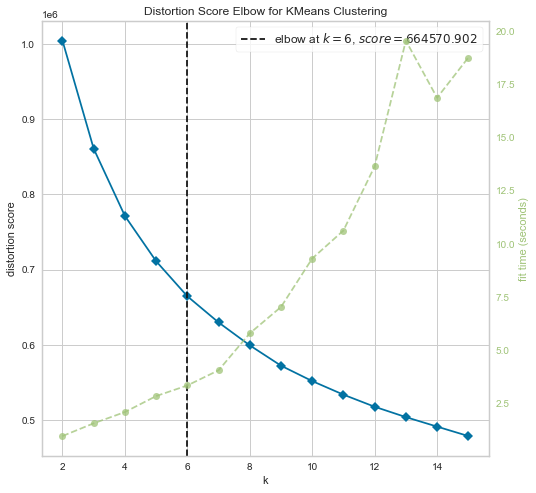

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
#Another way to evaluate elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 16))

visualizer.fit(data_scaled)   
visualizer.show()

**<font size="4">_From the plot, it is evident that optimal value of K is 6. However, we will be creating clusters for K=5 to K=6. Let us evaluate the value of K using Silhuoette Score Method_</font>**

### **K MEANS -  APPLYING SILHOUETTE SCORE WITH RANDOM SAMPLING (Alternative method)**
- Silhouette analysis can be used to study the separation distance between the resulting clusters 
- The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually

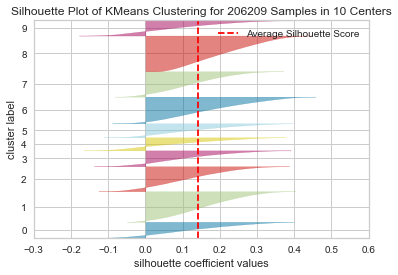

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 206209 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:

model = KMeans(10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()


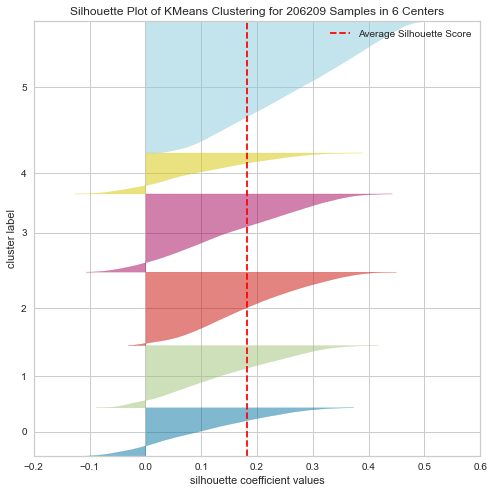

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 206209 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [102]:
model = KMeans(6, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()

**<font size="4">_As depicted, we tried Silhouette Scores for K=6 and K=10. K=6 is showing optimal results. To be on safe side, we will be building model with K=5 and K=6 values._</font>** 

### **Build Model for Clusters K=5**

In [60]:
km = KMeans(n_clusters=5, random_state=1) # Invoke Kmeans algo and create a model
clusters = km.fit_predict(data_scaled) # Fit the model for prediction

In [61]:
df_clustered = data_scaled[['num_orders', 'mean_delay', 'mean_products']] # Select features which will be used to determine clusters
df_clustered['cluster'] = clusters # Add cluster information to the original dataset

In [62]:
df_clustered.groupby('cluster').mean() # means of each cluster

,num_orders,mean_delay,mean_products
cluster,,,
0,-0.390791,0.434206,0.261193
1,-0.981528,0.312592,-1.614246
2,-0.454788,0.336258,0.006598
3,1.072559,-0.831125,0.371507
4,-0.330320,0.493899,0.335086


In [72]:
# Reshape data for snake plot
cluster_melt = pd.melt(df_clustered.reset_index(),
                       id_vars=['cluster'],
                       value_vars=['num_orders', 'mean_delay',
                                   'mean_products'],
                       var_name='Metric',
                       value_name='Value')

<Figure size 1080x576 with 0 Axes>

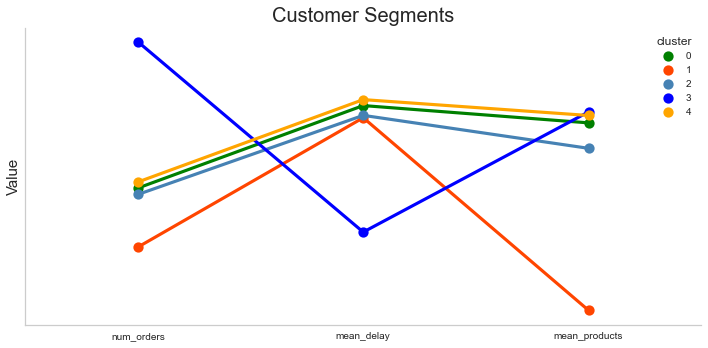

In [74]:
# Create snake plot
plt.figure(figsize=(15,8))
palette = ['green', 'orangered', 'steelblue', 'blue', 'orange', 'black', 'darkgreen', 'yellow']
plt.figure(figsize=(10,5))
sns.pointplot(x='Metric', y='Value', data=cluster_melt, hue='cluster', 
              palette=palette)
plt.xlabel('', fontsize=15)
plt.ylabel('Value', size=15)
plt.yticks([])
plt.title('Customer Segments', size=20)
sns.despine()
plt.tight_layout()
#plt.savefig('snake_plot.png', dpi=300, pad_inches=2.0)
plt.show()

## **Observations**

**<font size="4">Note: Here, the values on y-axis have been normalized. Hence, we are concluding results from the above plot.</font>**    

**<font size="4">From the plot, we can clearly see the separation among the five clusters. Below are some of the observations:</font>**     
**<font size="3.5">1. Cluster 0: This cluster has users who place average number of orders, and are not very frequent in re-ordering. However, they have bought items in bulk.</font>**   
**<font size="3.5">2. Cluster 1: This cluster belong to the consumers who have placed very less number of orders, are not very frequent in re-ordering the orders, and are very stingy while selecting the number of products.</font>**     
**<font size="3.5">3. Cluster 2: This cluster consists of customers who place average number of orders, are not very frequent in placing their orders, and have placed average number of products in their orders.</font>**     
**<font size="3.5">4. Cluster 3: This cluster belongs to the customers who place very large number of orders, and are very frequent in re-ordering. They have also ordered very large number of products in their orders.</font>**      
**<font size="3.5">5. Cluster 4: This cluster belongs to the customers who have placed second highest number of orders, but are infrequent in their purchases. Whenever, these customers have placed orders, number of products have been in bulk.</font>**    

### **Build Model for Clusters K=6**

In [75]:
km = KMeans(n_clusters=6, random_state=1) # Invoke Kmeans algo and create a model
clusters = km.fit_predict(data_scaled) # Fit the model for prediction

In [76]:
df_clustered = data_scaled[['num_orders', 'mean_delay', 'mean_products']] # Select features which will be used to determine clusters
df_clustered['cluster'] = clusters # Add cluster information to the original dataset

In [77]:
df_clustered.groupby('cluster').mean() # means of each cluster

,num_orders,mean_delay,mean_products
cluster,,,
0,-1.066140,0.417593,-1.822913
1,-0.347120,0.432560,0.304569
2,-0.317815,0.414371,0.285280
3,-0.439966,0.320589,0.013747
4,-0.434589,0.209818,-0.058937
5,1.130905,-0.845544,0.378008


In [78]:
# Reshape data for snake plot
cluster_melt = pd.melt(df_clustered.reset_index(),
                       id_vars=['cluster'],
                       value_vars=['num_orders', 'mean_delay',
                                   'mean_products'],
                       var_name='Metric',
                       value_name='Value')

<Figure size 1224x720 with 0 Axes>

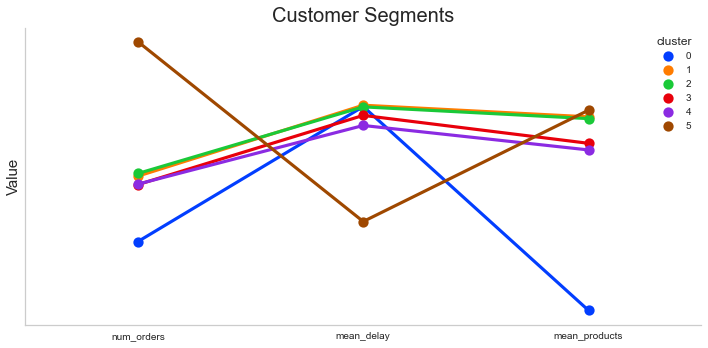

In [101]:
# Create snake plot
plt.figure(figsize=(17,10))
palette = ['darkgreen', 'orangered','cyan', 'purple', 'black', 'blue']
pal = sns.color_palette("tab10")
plt.figure(figsize=(10,5))
sns.pointplot(x='Metric', y='Value', data=cluster_melt, hue='cluster', 
              palette='bright')
plt.xlabel('', fontsize=15)
plt.ylabel('Value', size=15)
plt.yticks([])
plt.title('Customer Segments', size=20)
sns.despine()
plt.tight_layout()
#plt.savefig('snake_plot.png', dpi=300, pad_inches=2.0)
plt.show()

## **Observations**

**<font size="4">Note: Here, the values on y-axis have been normalized. Hence, we are concluding results from the above plot.</font>**    

**<font size="4">From the plot, we can clearly see the separation among the six clusters. Below are some of the observations:</font>**     
**<font size="3.5">1. Cluster 0: This cluster has users who place very less number of orders, and are not very frequent in re-ordering. They do not buy items in bulk.</font>**   
**<font size="3.5">2. Cluster 1: This cluster belong to the consumers who have placed average number of orders, and are not very frequent in re-ordering the orders. They, however, are spendthrifters and have bought items in large quantities.</font>**     
**<font size="3.5">3. Cluster 2: This cluster is very much like Cluster 1. Customers who belong to this cluster have placed average number of orders, and are infrequent in re-ordering from Instacart. However, they have bought items in bulk quantities.</font>**     
**<font size="3.5">4. Cluster 3: This cluster belongs to the customers who place average number of orders, and are not very frequent in re-ordering. They have bought products in average quantities.</font>**      
**<font size="3.5">5. Cluster 4: This cluster belongs to the customers who have placed average number of orders, but are not very frequent in their purchases. Whenever, these customers have placed orders, number of products have been in average quantities.</font>**      
**<font size="3.5">6. Cluster 5: This cluster consists of customers who have placed highest number of orders, and are very frequent in their orders. They are also spendthrift and have bought the items in large quantities.</font>**      

## **Conclusion**   

**<font size="3.5">_- On comparison of results with K=5 and K=6 values, we observe that there is overlapping of clusters in K=6 value. Thus, we get optimum results with K=5 value._</font>**    
**<font size="3.5">_- On further analysis, we have following recommendation for Marketing Team. These recommendations are on the basis of `K=5 value` for KMeans Clustering._</font>**     

## **Recommendations to the Marketing Team**    

**<font size="3.5">Cluster 0: These customers have placed average number of orders and have bought items in bulk, but are infrequent in re-ordering. Hence, Marketing team can target them with some promotional coupons to encourage them to buy frequently.</font>**     
**<font size="3.5">Cluster 1: These customers have placed very less number of orders, are infrequent and stingy in their orders. These are `Lost Customers`. We may not be able to retain them.</font>**     
**<font size="3.5">Cluster 2: These customers can be labeled as `At the verge of being Churned`. However, some efforts can be made to retain them by offering them discounts, promotions, etc.</font>**     
**<font size="3.5">Cluster 3: These are our `Favorite Customers`. They are very loyal to us. Marketing team can target them separately with special offers to reward them for their loyalty.</font>**    
**<font size="3.5">Cluster 4: The customers in this cluster have bought in bulk and have placed many orders. Only demerit is that they are not frequent in their purchases. These customers can be easily shifted to Cluster 3 by offering them rewards, promotions, discounts, etc.</font>**    

## **References**

- https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
- https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
- https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html